#Digit Classification Using Machine Learning
Digit classification is a common introductory task in machine learning and computer vision. In this task, the goal is to classify images of handwritten digits (0-9) into their respective categories.



#1. Importing the required libraries
The below given code is used to import the required libraries that are being used during the entire project.

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mlp
import tensorflow as tf
from tensorflow import keras

#2. Dataset
The MNIST dataset is a popular dataset for digit classification. It consists of a large number of 28x28 grayscale images of handwritten digits (0 through 9). Each image is labeled with the corresponding digit it represents, making it a suitable dataset for training and evaluating machine learning models for digit recognition tasks.
You can access the MNIST dataset using various machine learning libraries in Python, such as scikit-learn, TensorFlow, or PyTorch. Here's how to load the MNIST dataset using keras in tensorflow:

In [ ]:
digit_mnist = keras.datasets.mnist

#3. Train-Test Splitting of The Dataset
After loading the dataset, train and test data are splitted from the dataset.

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = digit_mnist.load_data()

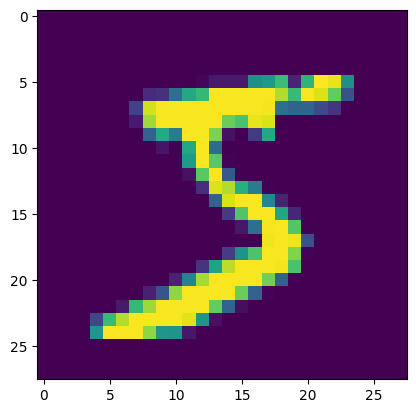

In [ ]:
plt.imshow(X_train_full[0]) ## It shows the first picture of the dataset in training data

In [ ]:
y_train_full[0] ##It is used to access the first label of the training dataset

5

In [ ]:
X_train_full[5]


#4. Normalisation
The normalisation of the dataset both the training and testing data will be done to bring them to same scale i.e. 0 and 1.

In [ ]:
X_train_n = X_train_full / 255.
X_test_n = X_test / 255.

#5. Validation dataset
Creating a validation set of 6000 images.

In [ ]:
X_valid, X_train = X_train_n[:6000], X_train_n[6000:]
y_valid, y_train = y_train_full[:6000], y_train_full[6000:]
X_test = X_test_n

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

#6. Model creation
The model created in this project is an ANN model that is made up of two dense layers one with 200 neurons and another with 100 neurons.
The output layer will consist of 10 neurons as there are 10 classes whose classification is to be done.
The activation function used in the output layer is softmax activation function. This function has been used because it is a kind of multiclass classification.

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

#6. Model Compilation
The compilation of the model is done with the metrics of accuracy.

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

#7. Training the model
The model is trained with 60 epochs i.e. the entire dataset is visited 60 times for training.

In [ ]:
model_history = model.fit(X_train, y_train, epochs=60,
                    validation_data=(X_valid, y_valid))

Epoch 1/60
1688/1688 [==============================] - 10s 5ms/step - loss: 0.6507 - accuracy: 0.8316 - val_loss: 0.3148 - val_accuracy: 0.9122
Epoch 2/60
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2929 - accuracy: 0.9159 - val_loss: 0.2474 - val_accuracy: 0.9303
Epoch 3/60
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2388 - accuracy: 0.9315 - val_loss: 0.2113 - val_accuracy: 0.9422
Epoch 4/60
1688/1688 [==============================] - 8s 5ms/step - loss: 0.2035 - accuracy: 0.9419 - val_loss: 0.1823 - val_accuracy: 0.9500
Epoch 5/60
1688/1688 [==============================] - 6s 3ms/step - loss: 0.1771 - accuracy: 0.9493 - val_loss: 0.1641 - val_accuracy: 0.9558
Epoch 6/60
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1566 - accuracy: 0.9560 - val_loss: 0.1489 - val_accuracy: 0.9592
Epoch 7/60
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1404 - accuracy: 0.9606 - val_loss: 0.1370 - val_accuracy

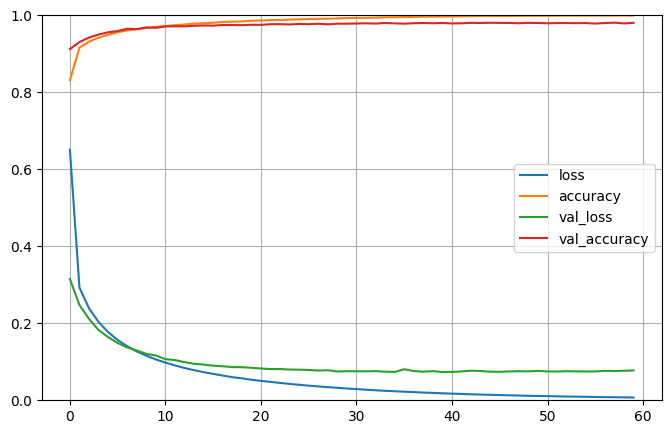

In [ ]:


pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
test_acc = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 5ms/step - loss: 0.0713 - accuracy: 0.9795


In [ ]:
test_acc

[0.07129251956939697, 0.9794999957084656]

In [ ]:
X_new = X_test[:3]

In [ ]:

y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 90ms/step


array([7, 2, 1])

AxesImage(size=(28, 28))


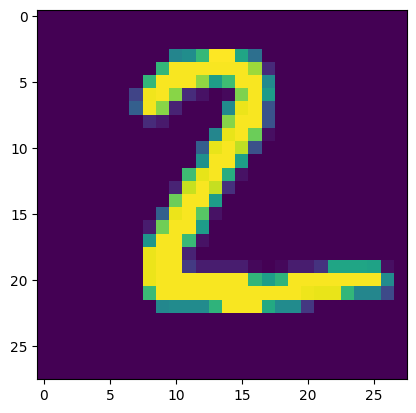

In [ ]:
print(plt.imshow(X_test[1]))